# SAT Optics Simulation: Requirements and Beam Sizes

This notebook predicts the beam sizes for the SAT optics in the near-field over the full MF band and also the far-field beam sizes on sky.

Grace E. Chesmore
March 2022

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sosat_optics
from sosat_optics import ot_geo, ray_trace, opt_analyze

matplotlib.rcParams["font.size"] = 16
matplotlib.rcParams.update(
    {
        "axes.grid": False,
        "grid.color": "grey",
        "grid.alpha": 0.2,
        "xtick.direction": "in",
        "ytick.direction": "in",
    }
)

red = '#e42536'
blue = '#570efc'
orange = '#f89c20'

# Load in telescope geometry
tele_geo = ot_geo.SatGeo() # Load in default geometry
rx = [0, 0, 0]  # receiver feed position in focal plane [x,d_FPA,y]
tele_geo.n_scan = 150  # sample number in 1D of 2D ray tracing
tele_geo.y_source = (
    ot_geo.y_lyot + 200
)  # distance of holography source from SAT focal plane.
fwhms = np.load('../feedhorn/fwhm_feedhorns.npy')

freq_arr = np.arange(70,170,10)
fwhm_mf = np.zeros((len(freq_arr),2))

for ii,fre in enumerate(freq_arr):
    tele_geo.lambda_ = opt_analyze.ghz_to_m(fre)  # wavelength of source, here we choose 106GHz.
    tele_geo.k = 2 * np.pi / tele_geo.lambda_  # update kappa
    tele_geo.th_fwhp_x = np.deg2rad(fwhms[np.where(fwhms[:,0]== int(fre)),1])*np.sqrt(2)
    tele_geo.th_fwhp_y = np.deg2rad(fwhms[np.where(fwhms[:,0]== int(fre)),2])*np.sqrt(2)

    sb = ray_trace.getNearField(tele_geo, rx,plot=False) # get near field

    fwhm_out = ray_trace.get_fwhm(sb) # get fwhm of near field
    fwhm_mf[ii,:] = fwhm_out

  0%|          | 0/22500 [00:00<?, ?it/s]/home/chesmore/.local/lib/python3.8/site-packages/sosat_optics/ot_geo.py:67: RuntimeWarning: invalid value encountered in sqrt
  amp = (c * r ** 2) / (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2)))
/home/chesmore/.local/lib/python3.8/site-packages/sosat_optics/ot_geo.py:109: RuntimeWarning: invalid value encountered in sqrt
  coeff_2 = (c * 2) / (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2)))
/home/chesmore/.local/lib/python3.8/site-packages/sosat_optics/ot_geo.py:111: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2))
/home/chesmore/.local/lib/python3.8/site-packages/sosat_optics/ot_geo.py:112: RuntimeWarning: invalid value encountered in sqrt
  * (1 + np.sqrt(1 - ((1 + k) * c ** 2 * r ** 2))) ** 2
/home/chesmore/.local/lib/python3.8/site-packages/sosat_optics/ray_trace.py:31: RuntimeWarning: invalid value encountered in sqrt
  s2 = (n1 / n2) * np.cross(N_surf, (np.cross(-N_surf, s1))) - N_surf * np.sqrt(

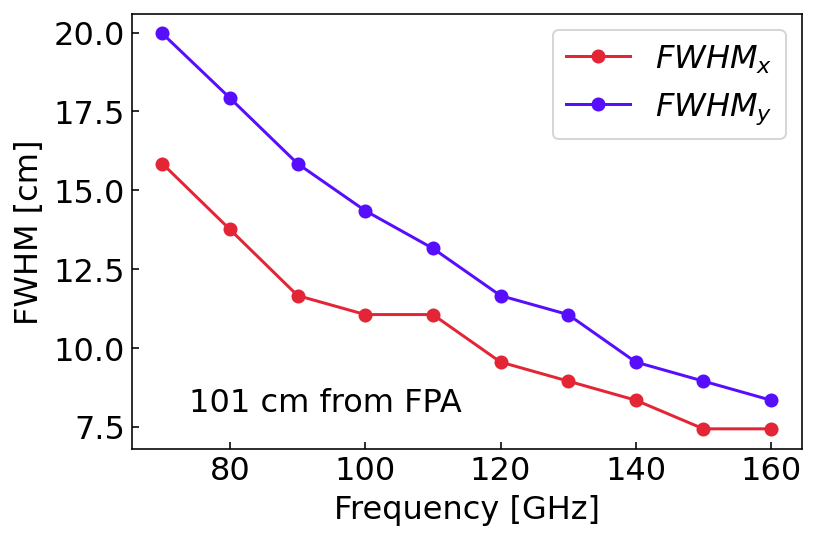

In [ ]:
plt.plot(freq_arr,fwhm_mf[:,0],'o-',color=red,label=r'$FWHM_{x}$')
plt.plot(freq_arr,fwhm_mf[:,1],'o-',color=blue,label=r'$FWHM_{y}$')
plt.annotate('%d cm from FPA' %(tele_geo.y_source/1e1), (74,8), color='k')
plt.xlabel('Frequency [GHz]')
plt.ylabel('FWHM [cm]')
plt.legend()
plt.show()